# US Population Growth

## (a)

In [3]:
import pandas as pd

# Import Data
df = pd.read_csv(r"C:\Users\Weekseey\Documents\Bellevue Work\Math for Data Science\week3data\us_pop_data.csv")

# Create the two columns
df['Years Since 1790'] = df['year'] - 1790

df['Population (Millions)'] = df['us_pop'] / 1_000_000

print(df.head())

   year    us_pop  Years Since 1790  Population (Millions)
0  1790   3929326                 0               3.929326
1  1800   5308483                10               5.308483
2  1810   7239881                20               7.239881
3  1820   9638453                30               9.638453
4  1830  12866020                40              12.866020


## (b)

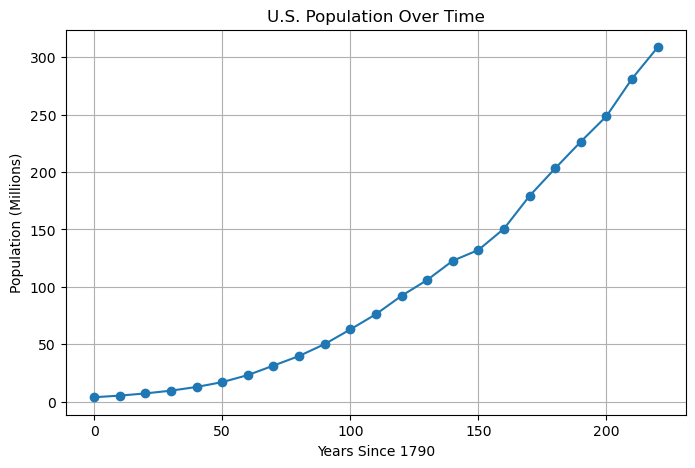

In [5]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(df['Years Since 1790'], df['Population (Millions)'], marker='o')
plt.title("U.S. Population Over Time")
plt.xlabel("Years Since 1790")
plt.ylabel("Population (Millions)")
plt.grid()
plt.show() 

## (c)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features (years since 1790) and target (population in millions)
X = df[['Years Since 1790']]
y = df['Population (Millions)']

# Fit the model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Get R-squared value
r2_linear = linear_model.score(X, y)

print(f"R2-value for the linear model: {r2_linear:.4f}")

R2-value for the linear model: 0.9192


## (d)

In [9]:
# Add the squared column

df['Years Since 1790 Squared'] = df['Years Since 1790'] ** 2

print(df.head())

   year    us_pop  Years Since 1790  Population (Millions)  \
0  1790   3929326                 0               3.929326   
1  1800   5308483                10               5.308483   
2  1810   7239881                20               7.239881   
3  1820   9638453                30               9.638453   
4  1830  12866020                40              12.866020   

   Years Since 1790 Squared  
0                         0  
1                       100  
2                       400  
3                       900  
4                      1600  


## (e)

In [11]:
# Define features (squared years) and target

X_squared = df[['Years Since 1790 Squared']]

# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_squared, y)

# Get R-squared value
r2_poly = poly_model.score(X_squared, y)

print(f"R2-value for polynomial model: {r2_poly:.4f}")

R2-value for polynomial model: 0.9985


## (f)

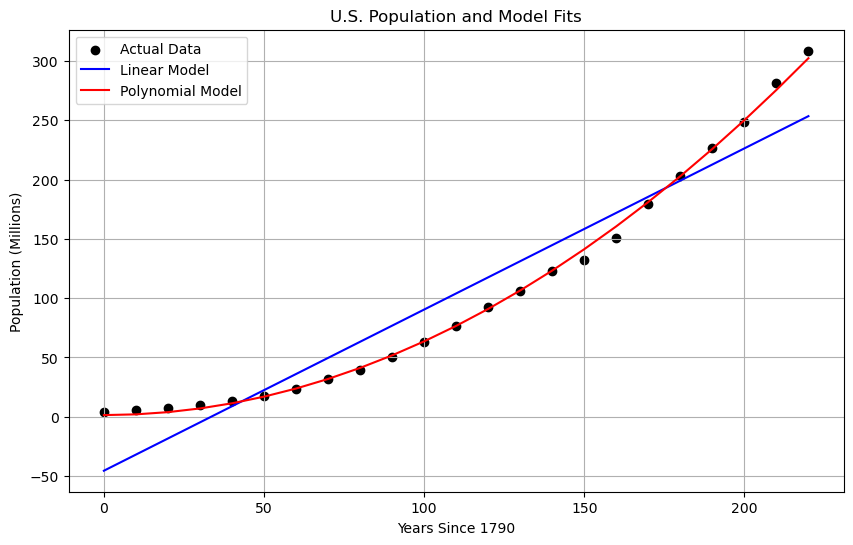

In [13]:
import numpy as np

# Generate predictions for the linear model
df['Linear Prediction'] = linear_model.predict(X)

# Generate predictions for the polynomial model
df['Polynomial Prediction'] = poly_model.predict(X_squared)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Years Since 1790'], df['Population (Millions)'], label="Actual Data", color="black")
plt.plot(df['Years Since 1790'], df['Linear Prediction'], label="Linear Model", color="blue")
plt.plot(df['Years Since 1790'], df['Polynomial Prediction'], label="Polynomial Model", color="red")
plt.title("U.S. Population and Model Fits")
plt.xlabel("Years Since 1790")
plt.ylabel("Population (Millions)")
plt.legend()
plt.grid()
plt.show()



### Linear Model

* **Feature:** Years Since 1790
* **R² Value:** 0.9192

### Polynomial Model

* **Feature:** Years Since 1790 Squared
* **R² Value:** 0.9985

The polynomial model fits the data better than the linear model, as evidenced by both the higher R² value and the closer alignment of the model's predictions with the observed data. This is consistent with expectations for modeling population growth, which often follows a non-linear pattern.

# Customer Spending Data

## (a)

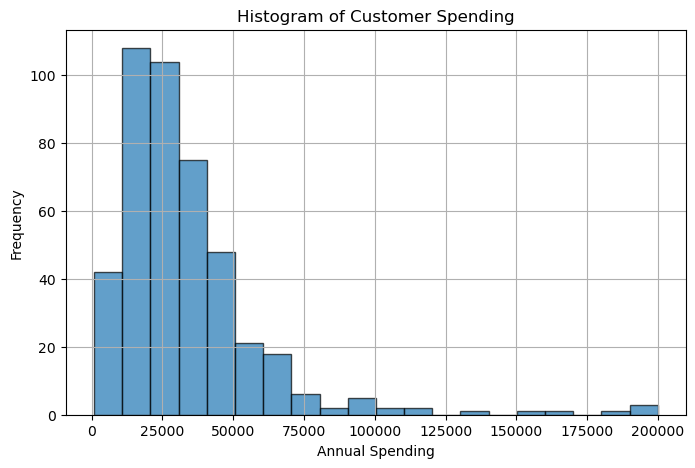

In [17]:
# Import Data
df = pd.read_csv(r"C:\Users\Weekseey\Documents\Bellevue Work\Math for Data Science\week3data\customer_spending.csv")

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df['ann_spending'], bins=20, edgecolor='k', alpha=0.7)
plt.title("Histogram of Customer Spending")
plt.xlabel("Annual Spending")
plt.ylabel("Frequency")
plt.grid()
plt.show()

## (b)

In [19]:
import numpy as np

# Log transform spending column
df['Log Spending'] = np.log(df['ann_spending'])

print(df.head())

   ann_spending  Log Spending
0         34112     10.437405
1         33266     10.412291
2         36610     10.508077
3         27381     10.217605
4         46100     10.738568


## (c)

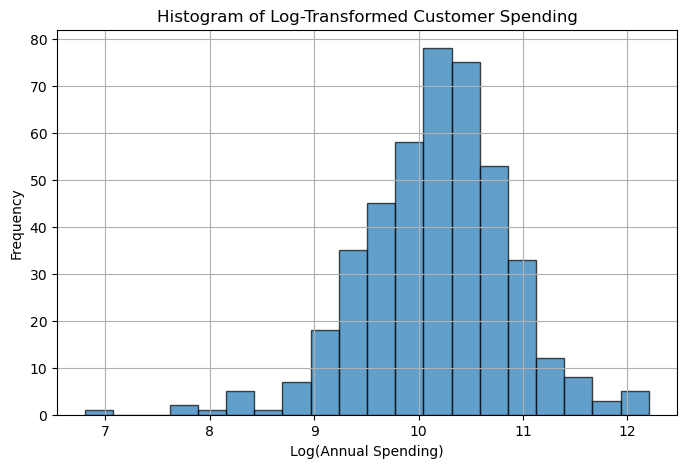

In [21]:
# Log-transformed histogram

plt.figure(figsize=(8, 5))
plt.hist(df['Log Spending'], bins=20, edgecolor='k', alpha=0.7)
plt.title("Histogram of Log-Transformed Customer Spending")
plt.xlabel("Log(Annual Spending)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

The original histogram is skewed, with many smaller amounts and few large ones. The log-transformed histogram is more symmetrical, resembling a normal distribution. Log transformation would be useful for this data for reducing the skewness and making the data more suitable for models like linear regression, which assume normally distributed residuals. 